In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [15]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [18]:
top_percentile = df['value'].quantile(0.975)
bottom_percentile = df['value'].quantile(0.025)
print(f"Top 2.5% threshold: {top_percentile}")
print(f"Bottom 2.5% threshold: {bottom_percentile}")
df = df[(df['value'] <= top_percentile) & (df['value'] >= bottom_percentile)]
df.head()

Top 2.5% threshold: 119851.0
Bottom 2.5% threshold: 23910.0


,value
date,
2016-06-20,28508
2016-06-21,26805
2016-06-27,24278
2016-06-29,27734
2016-06-30,26696


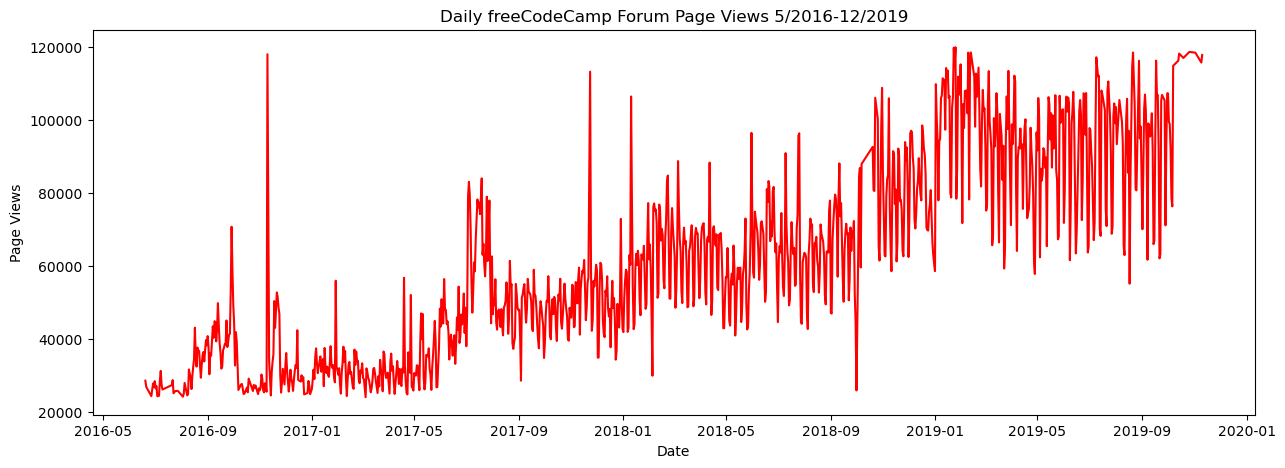

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df['value'], color='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
plt.show()

In [26]:
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
df_bar.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,26804.200000,26852.142857,32473.962963,41476.866667,30166.100000,36839.678571,29576.666667
2017,32785.161290,31113.071429,29754.758621,31685.555556,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,54975.965517,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,68031.241379,63591.064516,62831.612903,65941.733333,79737.625000,78688.333333,80047.483871
2019,101425.366667,101962.608696,89763.200000,87929.413793,91439.903226,90435.642857,92588.615385,92977.227273,91364.629630,103304.181818,117235.333333,NaN


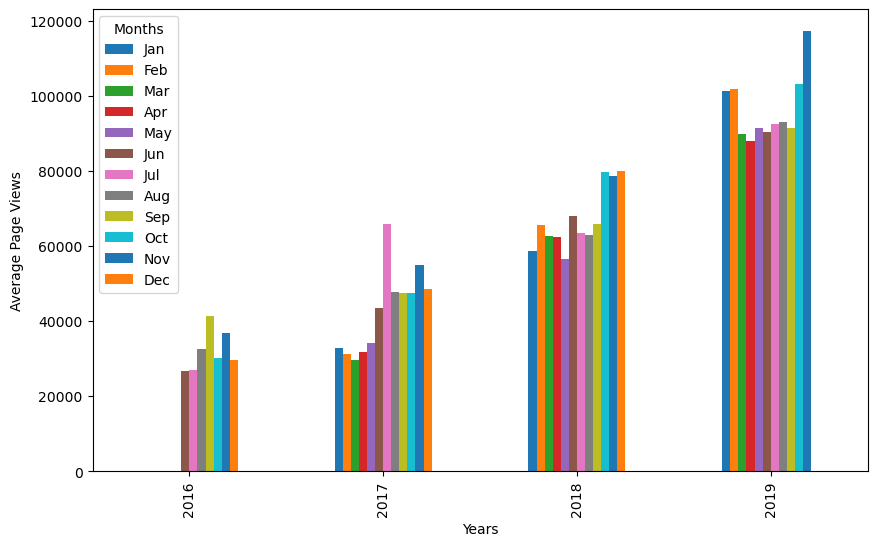

In [28]:
fig = df_bar.plot(kind='bar', figsize=(10, 6)).figure
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [31]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-06-20,28508,2016,Jun
1,2016-06-21,26805,2016,Jun
2,2016-06-27,24278,2016,Jun
3,2016-06-29,27734,2016,Jun
4,2016-06-30,26696,2016,Jun


/tmp/ipykernel_316232/4213898181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='value', data=df_box, ax=ax1, palette="Set1")
/tmp/ipykernel_316232/4213898181.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=ax2, palette="Set2")


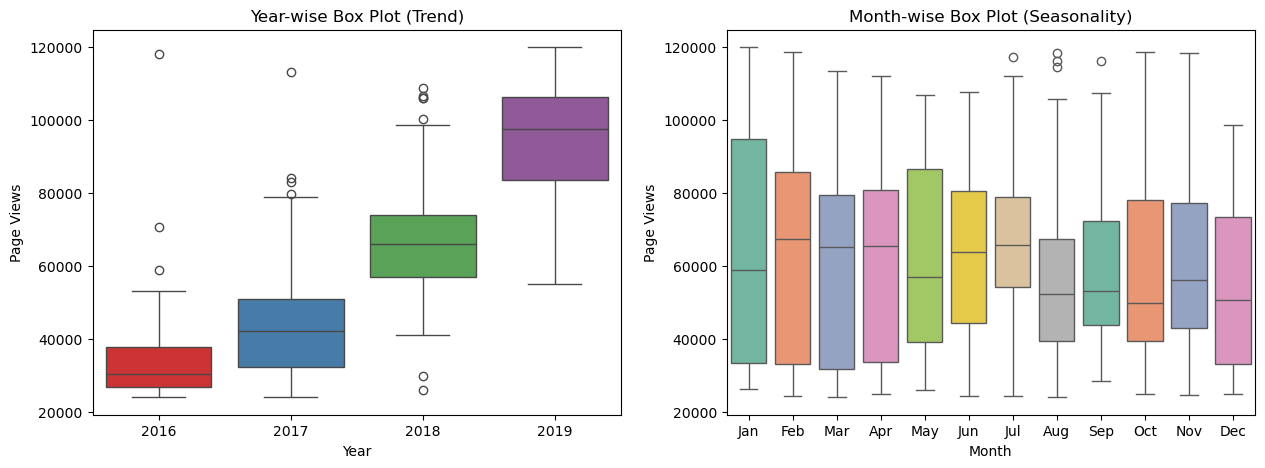

In [42]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(x='year', y='value', data=df_box, ax=ax1, palette="Set1")
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax2 = fig.add_subplot(1, 2, 2)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=ax2, palette="Set2")
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
plt.show()